# DATA CLEANING AND PREPARATION

### Examining Transaction Data

In [49]:
# Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [50]:
#Load relevant datasets

transaction_data = pd.read_excel("QVI_transaction_data.xlsx")
purchase_behaviour = pd.read_csv("QVI_purchase_behaviour (1).csv")

In [51]:
# Examining transaction data

transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [52]:
# Summarizing data to detect missing values and data types

transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


No null values are recorded. The date column is wrongly formatted as an integer. That should be corrected

In [53]:
# Change data type of date column

transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"], origin='1899-12-30', unit='D')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [54]:
# Exploring categorical data

transaction_data.value_counts("PROD_NAME")

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [55]:
# Exploring numerical data

transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


Product quantity appears to have an outlier of 200 which should be investigated further. 

<Axes: xlabel='PROD_QTY'>

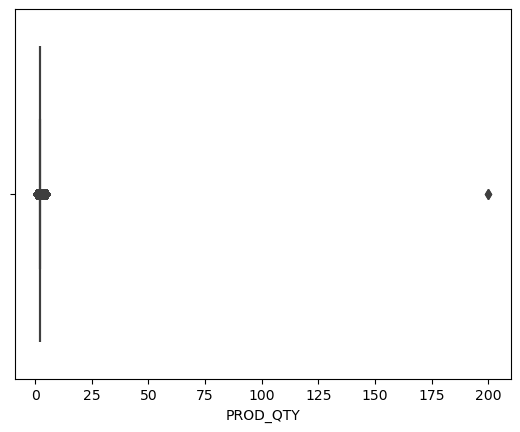

In [56]:
#Illustrating PROD_QTY on a box plot

sns.boxplot(data=transaction_data, x="PROD_QTY")

In [57]:
#Investigating outlier

transaction_data[transaction_data["PROD_QTY"]==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two yearly transactions where 200 packets of chips are bought in one transaction 
and both of these  transactions here by the same customer 
A further investigation using the loyalty card nbr should be conducted to confirm 
if there are any other transactions by the same customer..

In [58]:
#Investigating customer to see if there are other transactions

transaction_data[transaction_data["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


This customer has only made two transactions throughout the year, so they don't appear to be a regular retail customer. They might be purchasing chips for commercial purposes. This customer with loyalty card number 226000 would be excluded from further analysis.

In [59]:
#Removing PROD_QTY outlier

transaction_data = transaction_data[transaction_data["LYLTY_CARD_NBR"] != 226000]
transaction_data[transaction_data["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [60]:
#Exploring categorical data

transaction_data["PROD_NAME"].nunique()

print(f'There are {transaction_data["PROD_NAME"].nunique()} unique products sold at the Chips Supermarket.')

There are 114 unique products sold at the Chips Supermarket.


In [61]:
#Extracting unique product names

transaction_data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

There are salsa products (tomato paste) in the dataset but only products in the chips category are required for analysis. The salsa products would be removed from the dataset.

In [62]:
#Examining PROD_NAME to ensure that we're working with only chips products

# Extract unique product names
product_names = transaction_data["PROD_NAME"].unique()
words = [word for name in product_names for word in name.split()]

# Create a DataFrame from the words list
product_words_df = pd.DataFrame(words, columns=["word"])

# Remove words with digits
product_words_df = product_words_df[~product_words_df["word"].str.contains(r'\d')]

# Remove words without alphabetic characters
product_words_df = product_words_df[product_words_df["word"].str.contains(r'[A-Za-z]')]

# Count the frequency of each word
word_counts = product_words_df["word"].value_counts().reset_index()
word_counts.columns = ["word", "count"]
word_counts = word_counts.sort_values(by="count", ascending=False)

# Display the most common words
print(word_counts.head(10))


       word  count
0     Chips     21
1    Smiths     16
2   Crinkle     14
3       Cut     14
4    Kettle     13
5    Cheese     12
6      Salt     12
7  Original     10
8     Salsa      9
9      Chip      9


In [63]:
#Removing Salsa products

transaction_data = transaction_data[~transaction_data["PROD_NAME"].str.contains("salsa", case=False)]
transaction_data["PROD_NAME"].nunique()

105

In [64]:
#Exploring purchase patterns over time

transaction_data["DATE"].value_counts()

DATE
2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: count, Length: 364, dtype: int64

There are only 364 dates indicating a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

In [65]:
#check earliest date for date range

transaction_data["DATE"].min()

Timestamp('2018-07-01 00:00:00')

In [66]:
#check latest date for date range

transaction_data["DATE"].max()

Timestamp('2019-06-30 00:00:00')

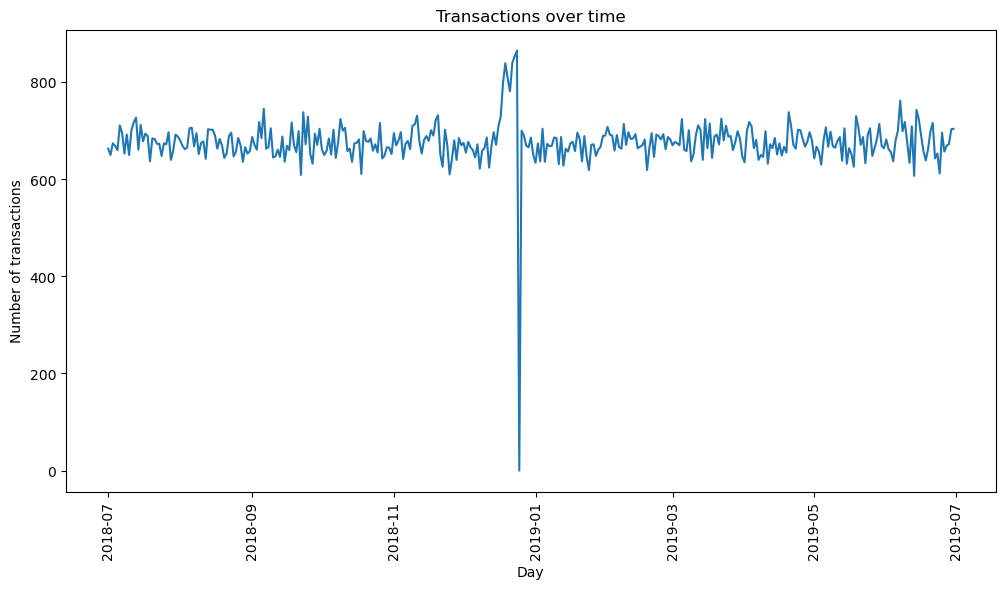

In [67]:

# Count the number of transactions by date
transactions_by_date = transaction_data.groupby("DATE").size().reset_index(name='N')

# Create a sequence of dates from 1st July 2018 to 30th June 2019
all_dates = pd.DataFrame(pd.date_range(start="2018-07-01", end="2019-06-30", freq="D"), columns=['DATE'])

# Merge the sequence of dates with the transaction counts
transactions_by_day = pd.merge(all_dates, transactions_by_date, on="DATE", how="left").fillna(0)

# Plot transactions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_by_day, x="DATE", y="N")
plt.xlabel("Day")
plt.ylabel("Number of transactions")
plt.title("Transactions over time")
plt.xticks(rotation=90)
plt.show()


 There is an increase in purchases in December and a break in late December. Let’s zoom in
 on this.

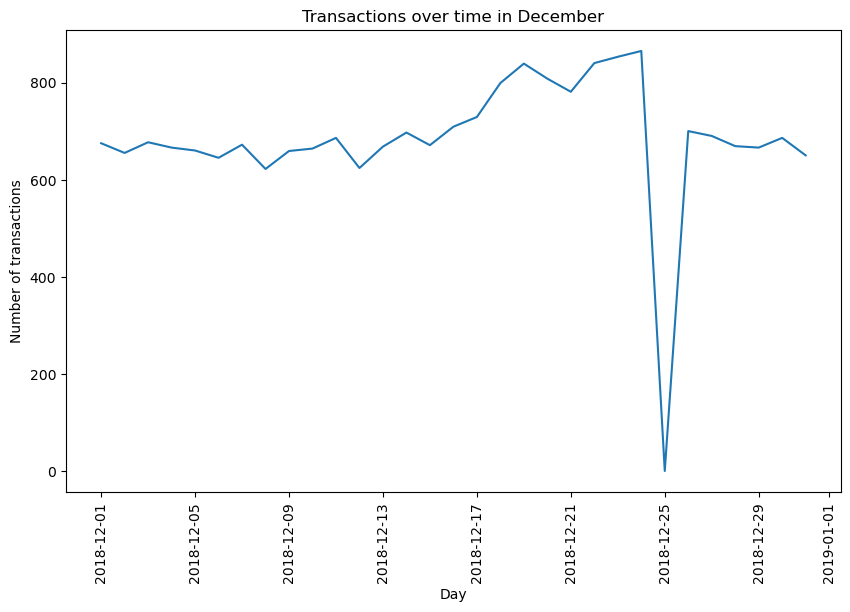

In [68]:
# Filter the data to only include December
transactions_december = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

# Plot transactions in December
plt.figure(figsize=(10, 6))
sns.lineplot(data=transactions_december, x='DATE', y='N')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time in December')
plt.xticks(rotation=90)
plt.show()


There's an increase in sales towards Christmas and there are no sales on Christmas day itself. Normally, Christmas day is a holiday. That could be why there were no sales recorded on that day.

In [69]:
#Extract pack size to draw insights on who spends on chips and what drives spends for each customer segment.

transaction_data["PACK_SIZE"] = transaction_data["PROD_NAME"].str.extract(r'(\d+)', expand=False).astype(float)

#Checking output to see if pack sizes have been extracted
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0


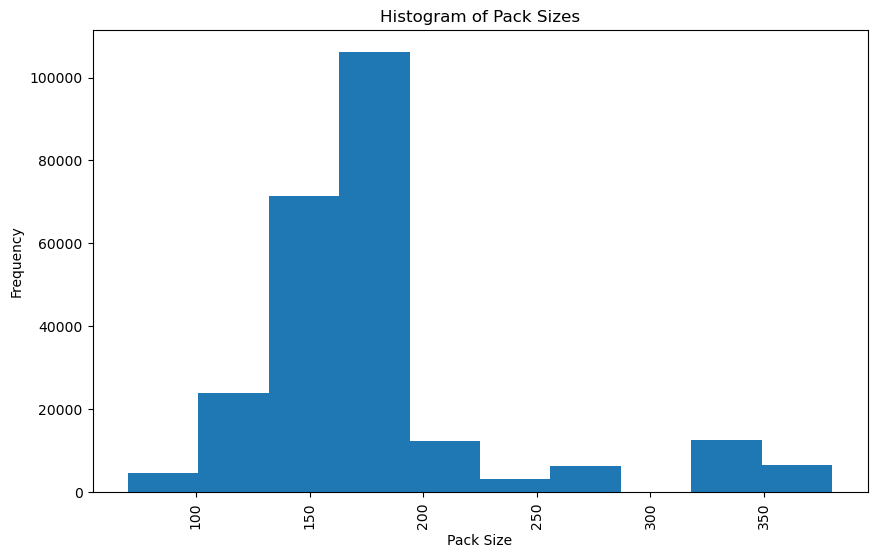

In [70]:
# Plotting the histogram
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
plt.hist(transaction_data['PACK_SIZE'], bins=10)
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Histogram of Pack Sizes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

In [71]:
#Extract brand name to draw insights on who spends on chips and what drives spends for each customer segment.

transaction_data["BRAND_NAME"] = transaction_data["PROD_NAME"].str.split().str[0]
transaction_data["BRAND_NAME"].value_counts()

BRAND_NAME
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

Some of the brand names have been abbreviated and separated to form new brand names such as Snbts which is supposed to be Sunbites. These names would have to be cleaned.

In [72]:
#Cleaning brand names

transaction_data['BRAND_NAME'] = transaction_data['BRAND_NAME'].replace({
    'RED': 'RRD',
    'Red': 'RRD',
    'Snbts': 'Sunbites',
    'Infzns': 'Infuzions',
    'WW': 'Woolworths',
    'WOOLWORTHS': 'Woolworths',
    'Smith': 'Smiths',
    'NCC': 'Natural',
    'NATURAL': 'Natural',
    'Dorito': 'Doritos',
    'Grain': 'GrnWves'
})

#Checking ouput to confirm if changes have been made
transaction_data["BRAND_NAME"].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'GrnWves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

### Examining Purchase Behaviour

In [73]:
# Exploring purchase behaviours for data_types and column info

purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [74]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [75]:
#Exploring the categorical columns further

purchase_behaviour.value_counts("LIFESTAGE")

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [76]:
purchase_behaviour.value_counts("PREMIUM_CUSTOMER")

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

There do not seem to be any data quality issues with the purchase behaviour data, proceeding to join both datasets together.


In [77]:
#Merging transaction_data and purchase_behaviour datasets for further analysis

chips_merged = pd.merge(transaction_data, purchase_behaviour, on="LYLTY_CARD_NBR", how="left")

#Check to ensure that all columns are available
chips_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE         246740 non-null  float64       
 9   BRAND_NAME        246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 22.6+ MB


All columns have been included and there are no nulls in the dataset. The data is cleaned and prepared for analysis.

# DATA ANALYSIS

In [78]:
chips_merged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [79]:
#Who spends the most on chips(totalsales),describing customers by lifestage and how premium their general purchasing behaviour is

#Aggregate the total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_lifestage_vs_premium = chips_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sales_lifestage_vs_premium.sort_values("TOT_SALES", ascending=False).head()

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60


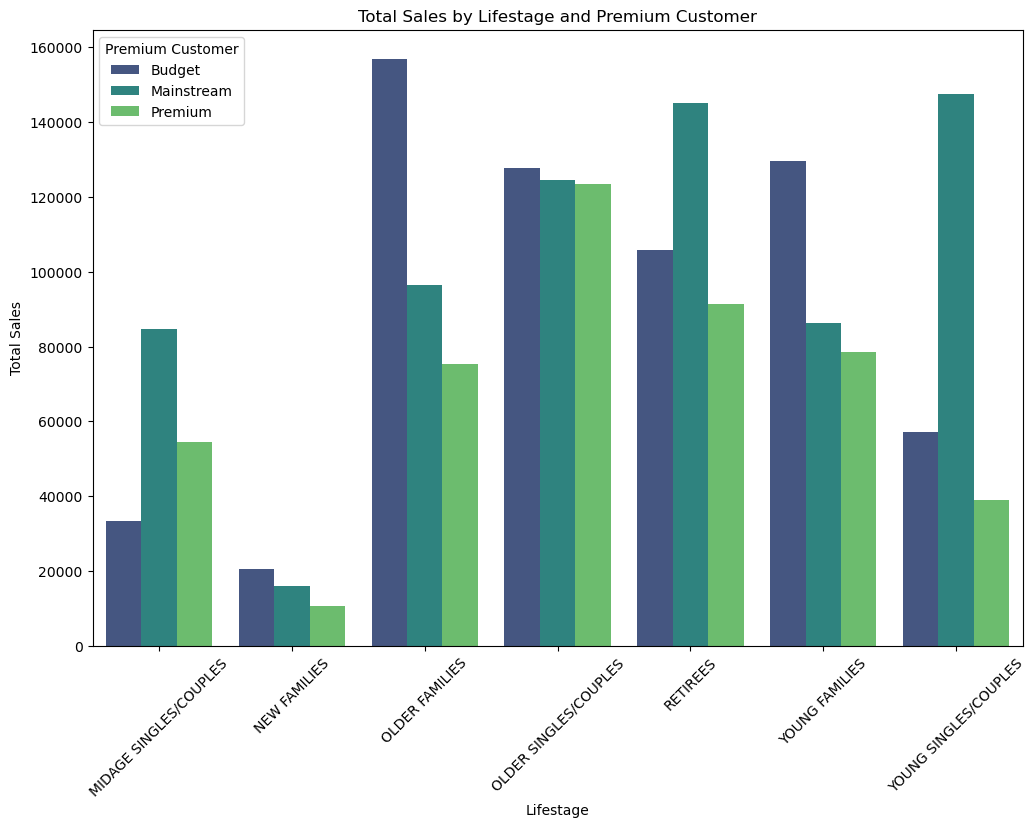

In [80]:
#Visualize aggregation to detect relationships
#Setting up the barplot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=sales_lifestage_vs_premium, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='viridis')

#Customizing barplot
plt.title('Total Sales by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.legend(title='Premium Customer')
plt.xticks(rotation=45)
plt.show()

The highest sales are being recorded by Budget-Older Families, Mainstream - Young Singles/Couples and Mainstream Retirees.

In [81]:
#How many customers are in each segment

#Aggregate the total number of unique customers by LIFESTAGE and PREMIUM_CUSTOMER
customers_lifestage_vs_premium = chips_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers_lifestage_vs_premium.sort_values("LYLTY_CARD_NBR", ascending=False).head()

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
19,YOUNG SINGLES/COUPLES,Mainstream,7917
13,RETIREES,Mainstream,6358
10,OLDER SINGLES/COUPLES,Mainstream,4858
9,OLDER SINGLES/COUPLES,Budget,4849
11,OLDER SINGLES/COUPLES,Premium,4682


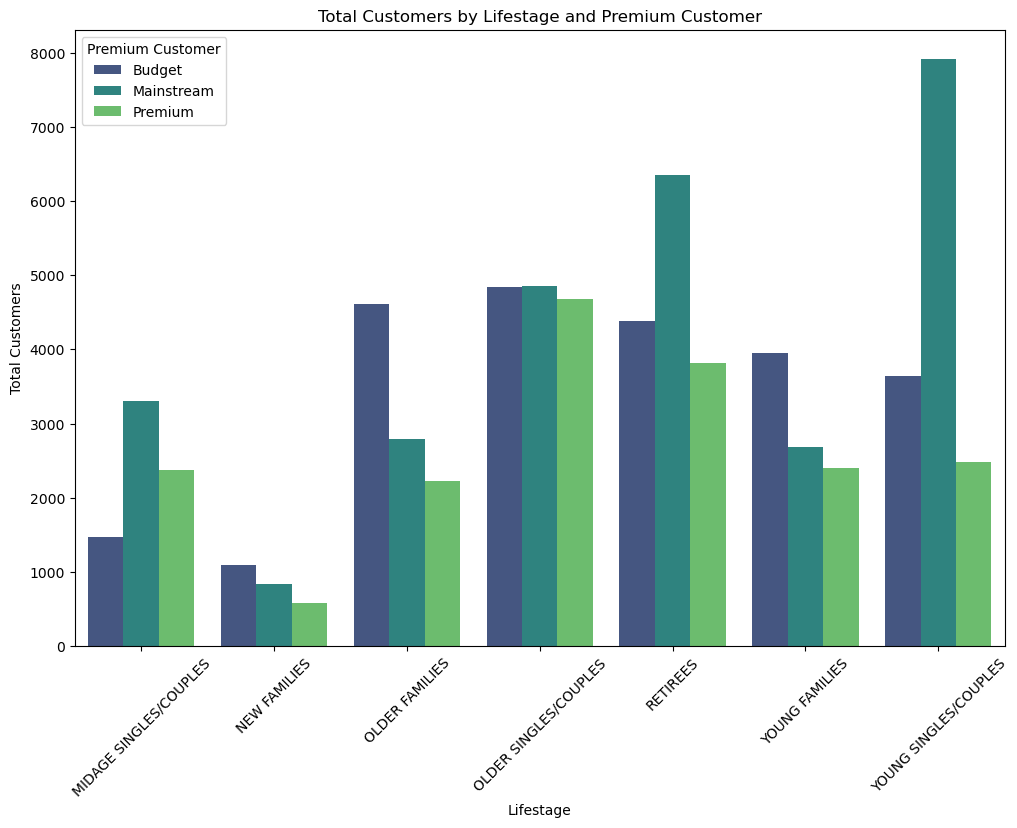

In [82]:
#Visualize aggregation to detect relationships
#Setting up the barplot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=customers_lifestage_vs_premium, x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER', palette='viridis')

#Customizing barplot
plt.title('Total Customers by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Total Customers')
plt.legend(title='Premium Customer')
plt.xticks(rotation=45)
plt.show()

There are more Mainstream Young Singles/Couples and Mainstream Retirees who buy chips. This contributes to higher sales in these customer segments, but may not be a major driver for the Budget Older Families segment.

In [83]:
#How many chips are bought per customer by segment

#Calculate the sum of product quantities and the unique number of customers for each group
grouped = chips_merged.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({
    'PROD_QTY': 'sum',
    'LYLTY_CARD_NBR': 'nunique'
}).reset_index()

# Calculate the average units per customer
grouped["AVG"] = grouped["PROD_QTY"] / grouped["LYLTY_CARD_NBR"]

# Sort the result by the average in descending order
grouped_sorted = grouped.sort_values("AVG", ascending=False)
grouped_sorted.head()

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,LYLTY_CARD_NBR,AVG
7,OLDER FAMILIES,Mainstream,25804,2788,9.255380
6,OLDER FAMILIES,Budget,41853,4611,9.076773
8,OLDER FAMILIES,Premium,20239,2231,9.071717
15,YOUNG FAMILIES,Budget,34482,3953,8.722995
17,YOUNG FAMILIES,Premium,20901,2398,8.716013


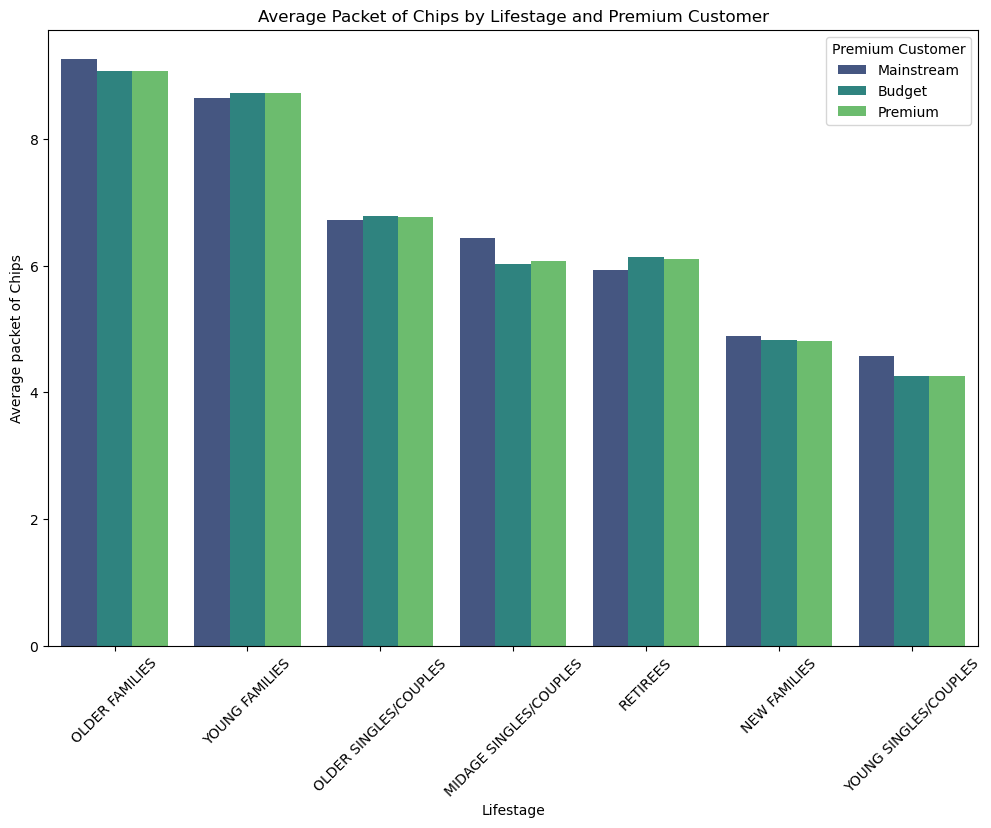

In [84]:
#Visualize aggregation to detect relationships
#Setting up the barplot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=grouped_sorted, x="LIFESTAGE", y="AVG", hue="PREMIUM_CUSTOMER", palette="viridis")

#Customizing barplot
plt.title('Average Packet of Chips by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Average packet of Chips')
plt.legend(title='Premium Customer')
plt.xticks(rotation=45)
plt.show()

 Older families and young families in general buy more chips per customer.


In [85]:
#What’s the average chip price by customer segment

#Create new column for Price
chips_merged["PRICE"] = chips_merged["TOT_SALES"]/chips_merged["PROD_QTY"]
chips_merged.head()


#Calculate average chip price by customer segment
avgprice_lifestage_vs_premium = chips_merged.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PRICE"].mean().reset_index()
avgprice_lifestage_vs_premium.sort_values("PRICE", ascending=False).head()

,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
19,YOUNG SINGLES/COUPLES,Mainstream,4.065642
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
12,RETIREES,Budget,3.924404
14,RETIREES,Premium,3.920942
3,NEW FAMILIES,Budget,3.917688


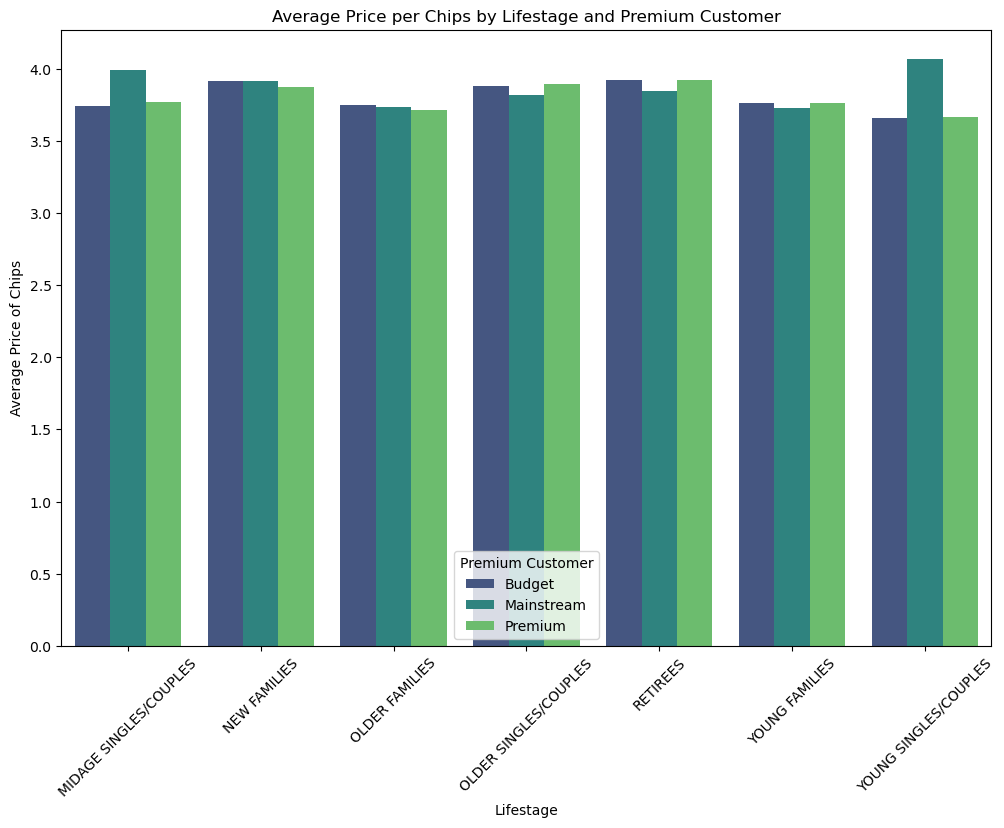

In [86]:
#Visualize aggregation to detect relationships
#Setting up the barplot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=avgprice_lifestage_vs_premium, x="LIFESTAGE", y="PRICE", hue="PREMIUM_CUSTOMER", palette="viridis")

#Customizing barplot
plt.title('Average Price per Chips by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Average Price of Chips')
plt.legend(title='Premium Customer')
plt.xticks(rotation=45)
plt.show()

Mainstream Young Singles/Couples and Midage Singles/Couples pay more per packet of chips compared to their budget and premium counterparts. This trend might be because premium shoppers are more inclined to buy healthy snacks, and when they do purchase chips, it's mainly for entertainment purposes rather than personal consumption. This is also evidenced by the fact that fewer premium mid-age and young singles and couples buy chips compared to their mainstream counterparts.

# EXPLORING CUSTOMER SEGMENTS

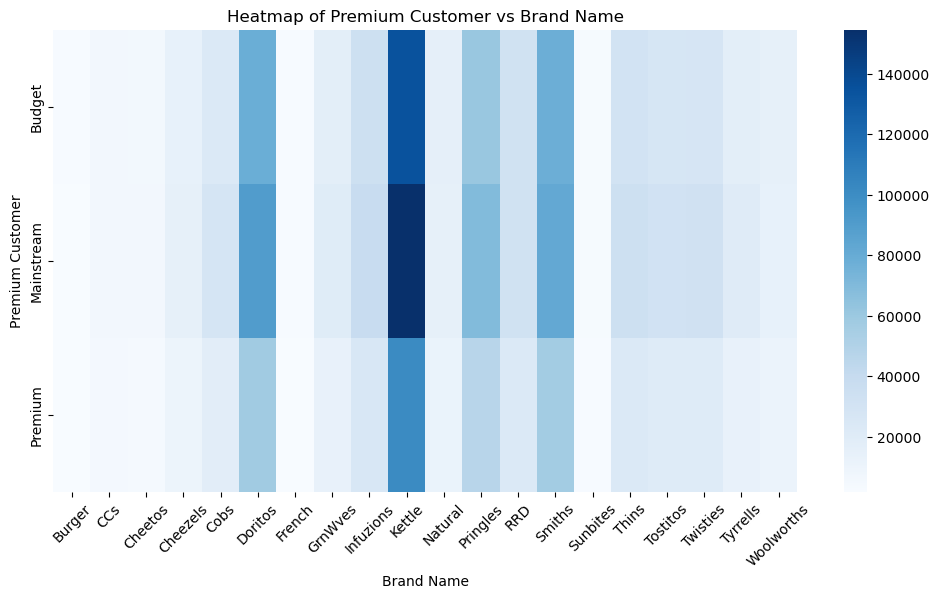

In [91]:
#Understanding the correlation between Premium Customer behaviour and brands of chips purchased using a heatmap
brand_vs_premium = chips_merged.groupby(["PREMIUM_CUSTOMER", "BRAND_NAME"])["TOT_SALES"].sum().reset_index()

# Create a pivot table for the heatmap
pivot_table = brand_vs_premium.pivot(index="PREMIUM_CUSTOMER", columns=["BRAND_NAME"], values="TOT_SALES")

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table,cmap='Blues', fmt='d', cbar=True)
plt.title('Heatmap of Premium Customer vs Brand Name')
plt.xlabel('Brand Name')
plt.ylabel('Premium Customer')
plt.xticks(rotation=45)
plt.show()

Kettle, Smiths, Pringles and Doritos brands tend to be the most patronized brands of chips.

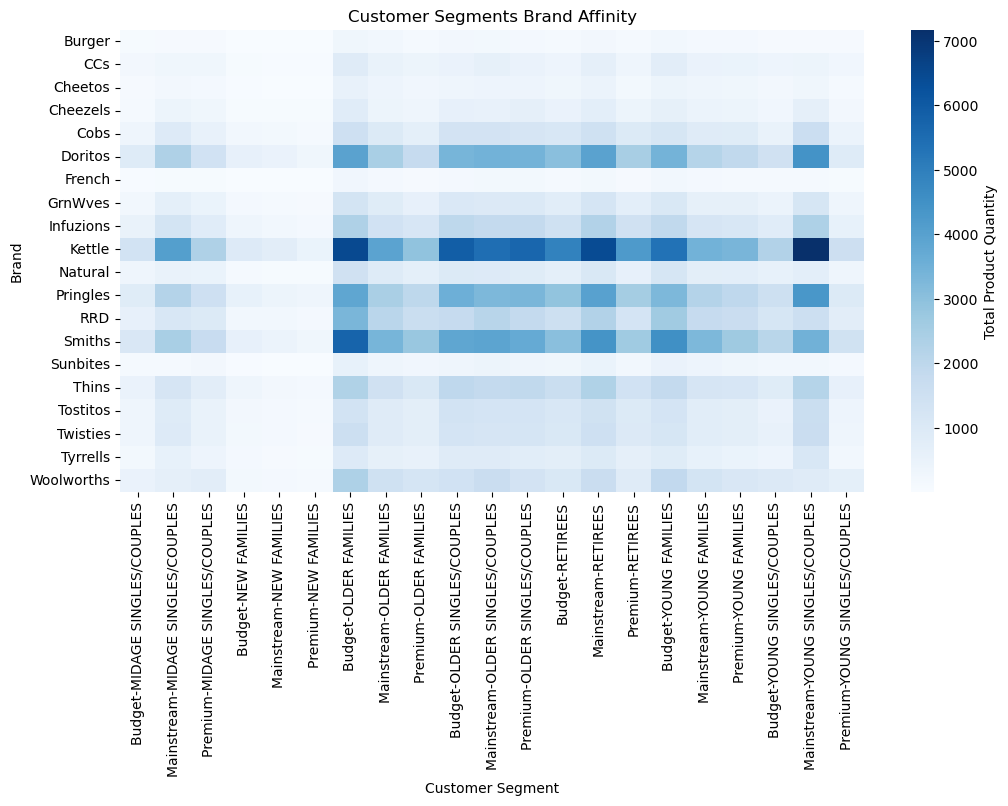

In [92]:
#Analyzing the customer segments and their affinity to brands of chips using a heatmap

brand_lifestage_vs_premium = chips_merged.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER", "BRAND_NAME"])["PROD_QTY"].sum().reset_index()

# Create a pivot table for the heatmap
pivot_table = brand_lifestage_vs_premium.pivot(index="BRAND_NAME", columns=["PREMIUM_CUSTOMER", "LIFESTAGE"], values="PROD_QTY")

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Total Product Quantity'})
plt.title("Customer Segments Brand Affinity")
plt.xlabel("Customer Segment")
plt.ylabel("Brand")
plt.xticks(rotation=90)
plt.show()

The highest brand affinity can be observed between Mainstream Young Singles/Couples, Budget Older Families, Older Singles/Couples and Kettle chips.

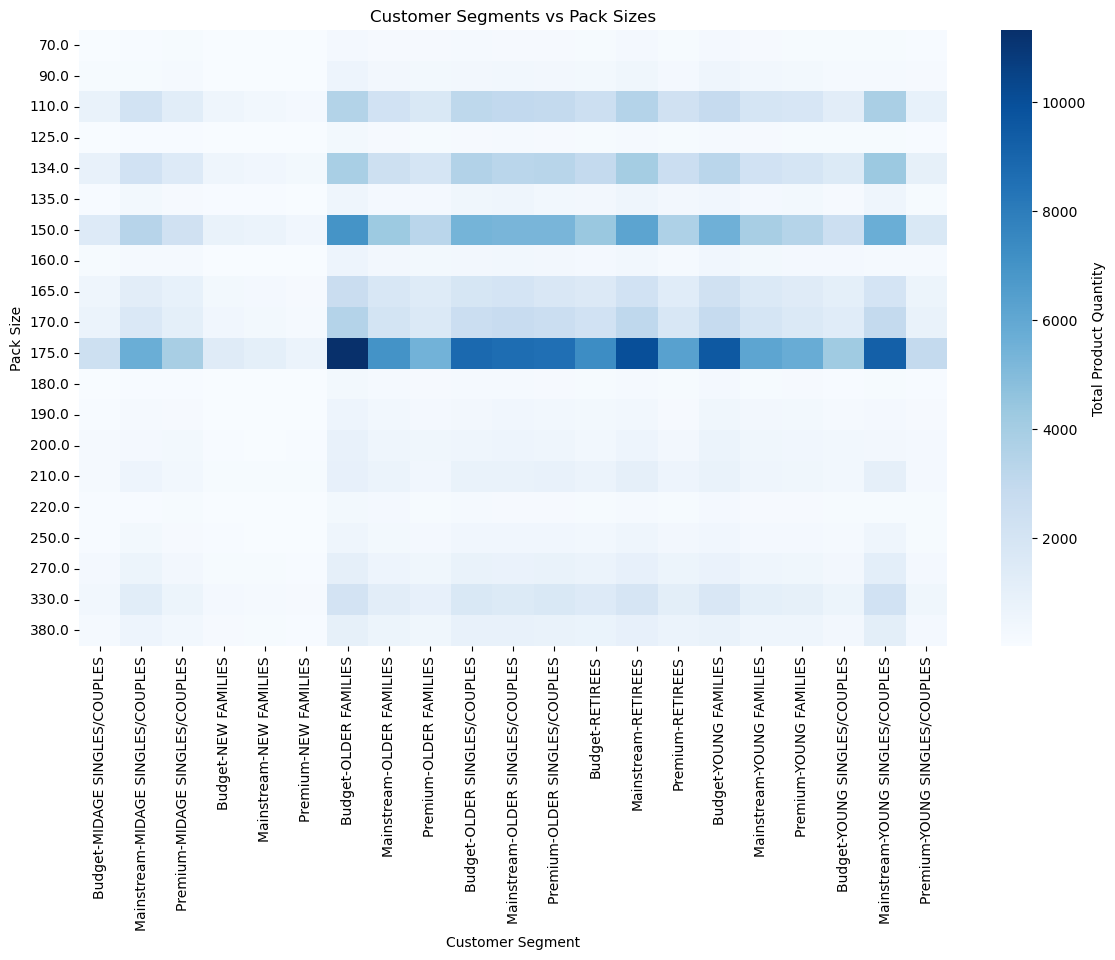

In [93]:
#Analyzing the correlation between customer segments and pack sizes using a heatmap

pcksize_lifestage_vs_premium = chips_merged.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER", "PACK_SIZE"])["PROD_QTY"].sum().reset_index()

# Create a pivot table for the heatmap
pivot_table = pcksize_lifestage_vs_premium.pivot(index="PACK_SIZE", columns=["PREMIUM_CUSTOMER", "LIFESTAGE"], values="PROD_QTY")

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Total Product Quantity'})
plt.title("Customer Segments vs Pack Sizes")
plt.xlabel("Customer Segment")
plt.ylabel("Pack Size")
plt.show()


Older Families and Older Singles/Couples tend to buy medium_sized chips(175g)

# SUMMARY AND RECOMMENDATIONS

Sales have primarily been driven by Budget Older Families, Mainstream Young Singles/Couples, and Mainstream Retirees. The high spending on chips by Mainstream Young Singles/Couples and Retirees can be attributed to their larger numbers compared to other buyers. Additionally, Mainstream Midage and Young Singles/Couples are more likely to pay a higher price per packet of chips. Kettle, Smiths, Pringles and Doritos brands tend to be the most patronized brands of chips. The highest brand affinity can be observed between Mainstream Young Singles/Couples and Budget Older Families who happen to be the customer segments driving the highest sales, Older Singles/Couples and Kettle chips. Kettle chips is known to be a healthy potato chip. That may explain the affinity of the older population and premium customers who are health conscious customer segments to the brand. Given that Budget Older Families, Mainstream Young Singles/Couples, and Mainstream Retirees record the highest sales, targeted promotions and discounts on their most preferred brand of chips could be run for these groups. This could include loyalty programs, bulk purchase discounts, or family-sized packaging options. Mainstream Young Singles/Couples and Midage Singles/Couples are willing to pay more per packet hence, marketing premium or unique flavors and limited-edition chips to them could be considered. Kettle, Smiths, Pringles, and Doritos chips should be prominently displayed and well-stocked, as they are the most patronized brands and Kettle chips specifically, to cater for the health conscious customer segments as well.